<a href="https://colab.research.google.com/github/athens-21/DE242/blob/main/De242_2_2025_TimeSeriesDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**programmer**: RAttanin Kliangmol

**date**: 18 Feb 2025

In [129]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

In [132]:
os.listdir()

['Untitled0.ipynb',
 'HW142_02.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb',
 'Untitled6.ipynb',
 'Untitled7.ipynb',
 'F1Bottts.ipynb',
 'Untitled8.ipynb',
 'Untitled9.ipynb',
 'Untitled10.ipynb',
 'Untitled11.ipynb',
 'Untitled12.ipynb',
 'Untitled13.ipynb',
 'Untitled14.ipynb',
 'Untitled15.ipynb',
 'Untitled17.ipynb',
 'Untitled18.ipynb',
 'Untitled19.ipynb',
 'Copy of Untitled16.ipynb',
 'Untitled16.ipynb',
 'Untitled20.ipynb',
 'Rattanin_252[Lab]Linear_algebra_with_SciPy_SVD.ipynb',
 'speech.ipynb',
 'Untitled21.ipynb',
 'Hotel282.ipynb',
 'de242-2-2025-InClassExcrise-predictingFootballResult-Rattanin.ipynb',
 '242 2.ipynb',
 'DE242-2-2025-Exercise02-Numpy and pandas.ipynb',
 'Numpy.ipynb',
 'Pandas.ipynb',
 'py_logic.ipynb',
 'DE242-2-2025-Lecture03-Descriptive-statistics-0252 .ipynb',
 'De242-2-2025-Lectrue04-Data visualization using matplotlib.ipynb',
 'Myproject.ipynb',
 'pythonlearn.ipynb',
 'inClass E

In [133]:
tsdf = pd.read_excel('excel_files/Energy Production _ Consumption.xlsx', skiprows=4, sheet_name='Data', parse_dates=True, index_col='Year')
if tsdf.shape[1] == 1:  # Check if DataFrame has only one column
  tsdf = tsdf.squeeze()  # Convert to Series if necessary
tsdf.head()

,Production,Production.1,Imports,Exports,Consumption,Consumption,Power Consumption
Year,,,,,,,
1949-01-01,28.748176,31.722160,1.448158,1.591760,29.002099,31.981503,0.0
1950-01-01,32.562667,35.540384,1.912887,1.465322,31.631956,34.615768,0.0
1951-01-01,35.792151,38.750615,1.892425,2.621545,34.008105,36.974030,0.0
1952-01-01,34.976732,37.916913,2.145984,2.365131,33.799903,36.747825,0.0
1953-01-01,35.349336,38.180796,2.313042,1.866013,34.826156,37.664468,0.0


In [134]:
tsdf.rename(columns={'Production':'FossilFuels_Production'}, inplace=True)
tsdf.columns

Index(['FossilFuels_Production', 'Production.1', 'Imports', 'Exports',
       'Consumption ', 'Consumption', 'Power Consumption'],
      dtype='object')

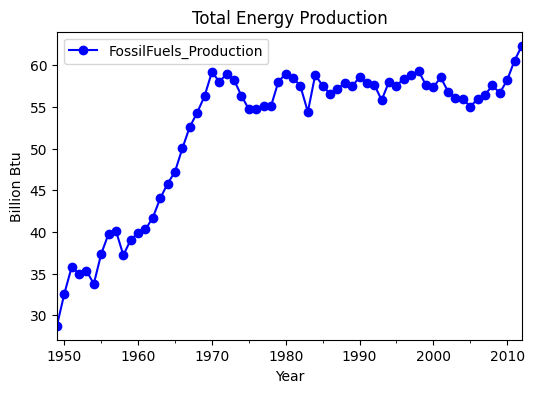

In [135]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()### gca() = get current axis
tsdf['FossilFuels_Production'].plot(marker='o', color='blue', legend=True)
ax.set_title('Total Energy Production')
ax.set_ylabel('Billion Btu')
fig.savefig('time-series-with-trend.jpg', dpi=fig.dpi, bbox_inches='tight',
pad_inches=0.5)
plt.show()

In [136]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_excel('excel_files/Tablet Computer Sales.xlsx', skiprows=2)
df.set_index('Week', inplace=True)
result = adfuller(df['Units Sold'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')



ADF Statistic: -4.214348
p-value: 0.000623
Critical Values:


In [137]:
import warnings
warnings.simplefilter("ignore")

In [138]:
df = pd.read_excel('excel_files/Tablet Computer Sales.xlsx', skiprows=2)
df.head()

,Week,Units Sold
0,1,88
1,2,44
2,3,60
3,4,56
4,5,70


In [139]:
df = df.set_index('Week')
df.head()

,Units Sold
Week,
1,88
2,44
3,60
4,56
5,70


In [140]:
def sma_forecast(df, f_week, k):
    if f_week <= k:
        raise ValueError("f_week > k")

    total = 0
    lst = df.iloc[f_week-k-1:f_week-1, 0].tolist()

    for i in range(k):
        total += lst[i]

    return total / k

print(sma_forecast(df, 18, 3))

67.66666666666667


In [141]:
df['SMA_k3'] = df.iloc[:, 0].shift().rolling(window=3).mean()
df.head()

,Units Sold,SMA_k3
Week,,
1,88,NaN
2,44,NaN
3,60,NaN
4,56,64.000000
5,70,53.333333


In [142]:
df['Error_k3'] = df['Units Sold'] - df['SMA_k3']
df['AbsError_k3'] = abs(df['Error_k3'])
df['SqrError_k3'] = df['Error_k3']**2
df['PctAbsError_k3'] = (df['AbsError_k3']/df['Units Sold']*100)

In [143]:
print(df)

      Units Sold     SMA_k3   Error_k3  AbsError_k3  SqrError_k3  \
Week                                                               
1             88        NaN        NaN          NaN          NaN   
2             44        NaN        NaN          NaN          NaN   
3             60        NaN        NaN          NaN          NaN   
4             56  64.000000  -8.000000     8.000000    64.000000   
5             70  53.333333  16.666667    16.666667   277.777778   
6             91  62.000000  29.000000    29.000000   841.000000   
7             54  72.333333 -18.333333    18.333333   336.111111   
8             60  71.666667 -11.666667    11.666667   136.111111   
9             48  68.333333 -20.333333    20.333333   413.444444   
10            35  54.000000 -19.000000    19.000000   361.000000   
11            49  47.666667   1.333333     1.333333     1.777778   
12            44  44.000000   0.000000     0.000000     0.000000   
13            61  42.666667  18.333333    18.333

In [144]:
print(df['PctAbsError_k3'].mean())

25.374135105123393


In [145]:
MAD = df['AbsError_k3'].mean()
MSE = df['SqrError_k3'].mean()
RMSE = np.sqrt(MSE)
MAPE = df['PctAbsError_k3'].mean()
print('MAD = {:0.2f}'.format(MAD))
print('MSE = {:0.2f}'.format(MSE))
print('RMSE = {:0.2f}'.format(RMSE))
print('MAPE = {:0.2f}'.format(MAPE))

MAD = 14.86
MSE = 299.84
RMSE = 17.32
MAPE = 25.37


In [146]:
df['SMA_k2'] = df.iloc[:, 0].shift().rolling(window=2).mean()
df.head()

,Units Sold,SMA_k3,Error_k3,AbsError_k3,SqrError_k3,PctAbsError_k3,SMA_k2
Week,,,,,,,
1,88,NaN,NaN,NaN,NaN,NaN,NaN
2,44,NaN,NaN,NaN,NaN,NaN,NaN
3,60,NaN,NaN,NaN,NaN,NaN,66.0
4,56,64.000000,-8.000000,8.000000,64.000000,14.285714,52.0
5,70,53.333333,16.666667,16.666667,277.777778,23.809524,58.0


In [147]:
df['Error_k2'] = df['Units Sold'] - df['SMA_k2']
df['AbsError_k2'] = abs(df['Error_k2'])
df['SqrError_k2'] = df['Error_k2']**2
df['PctAbsError_k2'] = (df['AbsError_k2']/df['Units Sold']*100)

In [148]:
print(df['PctAbsError_k2'].mean())

23.62596796162493


In [149]:
MAD1 = df['AbsError_k2'].mean()
MSE1 = df['SqrError_k2'].mean()
RMSE1 = np.sqrt(MSE)
MAPE1 = df['PctAbsError_k2'].mean()
print('MAD = {:0.2f}'.format(MAD))
print('MSE = {:0.2f}'.format(MSE))
print('RMSE = {:0.2f}'.format(RMSE))
print('MAPE = {:0.2f}'.format(MAPE))

MAD = 14.86
MSE = 299.84
RMSE = 17.32
MAPE = 25.37


In [150]:
pip install --upgrade pandas

In [151]:
tsdf = pd.read_excel('excel_files/Coal Production.xlsx', skiprows=2, sheet_name='Data', parse_dates=True, index_col='Year')
if tsdf.shape[1] == 1:  # Check if only one column
  tsdf = tsdf.squeeze()  # Convert to Series

In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#The file contains data from 1960 to 2011
#The example uses the data from 1960-2007 and predicts total tons on 2008-2010
#alpha = 0.94 and beta=0.06
model = ExponentialSmoothing(tsdf.loc['1960-01-01':'2007-01-01'], trend='add')
model_fit = model.fit(smoothing_level=0.94, smoothing_slope=0.06)
model_fit.predict(start='2008-01-01', end='2010-01-01')

,0
2008-01-01,1.160073e+09
2009-01-01,1.172751e+09
2010-01-01,1.185429e+09


In [153]:
tsdf = pd.read_excel('excel_files/Gas _ Electric.xlsx', skiprows=2, sheet_name='Data',
parse_dates=True, index_col='Month')

In [154]:
tsdf.head()

,Gas Use,Electric Use
Month,,
Jan,244,967
Feb,228,795
Mar,153,820
Apr,140,672
May,55,722


In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(tsdf['Gas Use '], trend=None, seasonal='mul',
seasonal_periods=12)
##No trend --> no beta or smoothing_slope
##With seasonality --> gamma or smoothing_seasonal
model_fit = model.fit(smoothing_level=0.1, smoothing_seasonal=0.6)
model_fit.predict(start='Jan', end='Dec')

,0
Month,
Jan,234.074081
Feb,230.931761
Mar,182.760986
Apr,130.623967
May,43.398851
Jun,31.307008
Jul,26.261209
Aug,24.616403
Sep,26.206664


In [156]:
from datetime import datetime
dt_str = 'Friday, November 15, 2019'
dt_obj = datetime.strptime(dt_str, '%A, %B %d, %Y')
print(dt_obj)


2019-11-15 00:00:00


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [158]:
#Load dataset (Example: PM2.5 pollution data)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv"
df = pd.read_csv(url, parse_dates=[['year', 'month', 'day', 'hour']], index_col=0)

# Keep only PM2.5 column and drop missing values
df = df[['pm2.5']].dropna()
df.columns = ['PM2.5']
df.head()

,PM2.5
year_month_day_hour,
2010 1 2 0,129.0
2010 1 2 1,148.0
2010 1 2 2,159.0
2010 1 2 3,181.0
2010 1 2 4,138.0


In [159]:
df.reset_index(inplace=True)
df[['year', 'month', 'day', 'hour']] = df['year_month_day_hour'].str.split(expand=True)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].astype(int))
df.set_index('datetime', inplace=True)
df.drop(columns=['year_month_day_hour', 'year', 'month', 'day', 'hour'], inplace=True)
df.head()


,PM2.5
datetime,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0


In [160]:
df.shape

(41757, 1)

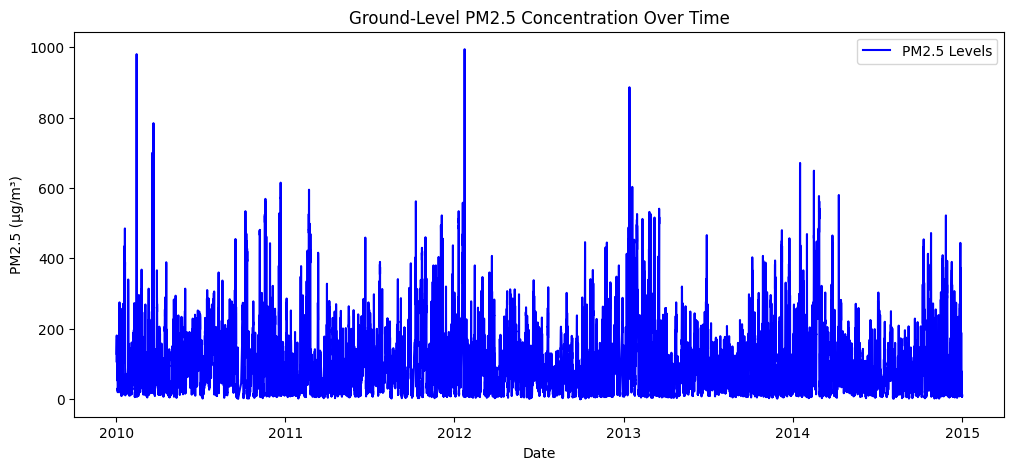

In [161]:
# Plot PM2.5 levels over time
plt.figure(figsize=(12,5))
plt.plot(df, label="PM2.5 Levels", color='blue')
plt.title("Ground-Level PM2.5 Concentration Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [163]:
selected_data = df.loc['2010-01-02 00:00:00':'2010-01-02 05:00:00']
print(selected_data)

                     PM2.5
datetime                  
2010-01-02 00:00:00  129.0
2010-01-02 01:00:00  148.0
2010-01-02 02:00:00  159.0
2010-01-02 03:00:00  181.0
2010-01-02 04:00:00  138.0
2010-01-02 05:00:00  109.0


In [164]:
selected_df = pd.DataFrame(selected_data)
selected_df.head()

,PM2.5
datetime,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0


In [165]:
selected_df.index = selected_df.index.to_period('h')
print(selected_df.index)

PeriodIndex(['2010-01-02 00:00', '2010-01-02 01:00', '2010-01-02 02:00',
             '2010-01-02 03:00', '2010-01-02 04:00', '2010-01-02 05:00'],
            dtype='period[h]', name='datetime')


In [167]:
# Apply Moving Average (Rolling Window)
window_size = 3 # 3-hour moving average
selected_df["Moving_Avg"] = selected_df["PM2.5"].rolling(window=window_size).mean()

# Apply Simple Exponential Smoothing (SES)
alpha = 0.5 # Smoothing factor (0 < alpha < 1)
ses_model = SimpleExpSmoothing(selected_df["PM2.5"]).fit(smoothing_level=alpha, optimized=False)
selected_df["SES_Forecast"] = ses_model.fittedvalues

# Apply Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(selected_df["PM2.5"], trend="add", seasonal=None, damped_trend=True).fit()
selected_df["HW_Forecast"] = hw_model.fittedvalues


In [168]:
selected_df.head()

,PM2.5,Moving_Avg,SES_Forecast,HW_Forecast
datetime,,,,
2010-01-02 00:00,129.0,NaN,129.000,129.005834
2010-01-02 01:00,148.0,NaN,129.000,148.495818
2010-01-02 02:00,159.0,145.333333,138.500,163.350632
2010-01-02 03:00,181.0,162.666667,148.750,169.078397
2010-01-02 04:00,138.0,159.333333,164.875,194.540358


In [169]:
# Evaluate Model Performance (MAE & RMSE)
selected_df.dropna(inplace=True) # Remove NaN values from moving average
mae_ma = mean_absolute_error(selected_df["PM2.5"], selected_df["Moving_Avg"])
rmse_ma = np.sqrt(mean_squared_error(selected_df["PM2.5"], selected_df["Moving_Avg"]))
mae_ses = mean_absolute_error(selected_df["PM2.5"], selected_df["SES_Forecast"])
rmse_ses = np.sqrt(mean_squared_error(selected_df["PM2.5"], selected_df["SES_Forecast"]))
mae_hw = mean_absolute_error(selected_df["PM2.5"], selected_df["HW_Forecast"])
rmse_hw = np.sqrt(mean_squared_error(selected_df["PM2.5"], selected_df["HW_Forecast"]))


In [170]:
# Print evaluation results
print(f"Moving Average - MAE: {mae_ma:.2f}, RMSE: {rmse_ma:.2f}")
print(f"Exponential Smoothing - MAE: {mae_ses:.2f}, RMSE: {rmse_ses:.2f}")
print(f"Holt-Winters - MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")


Moving Average - MAE: 21.75, RMSE: 22.98
Exponential Smoothing - MAE: 30.52, RMSE: 31.56
Holt-Winters - MAE: 21.45, RMSE: 29.69


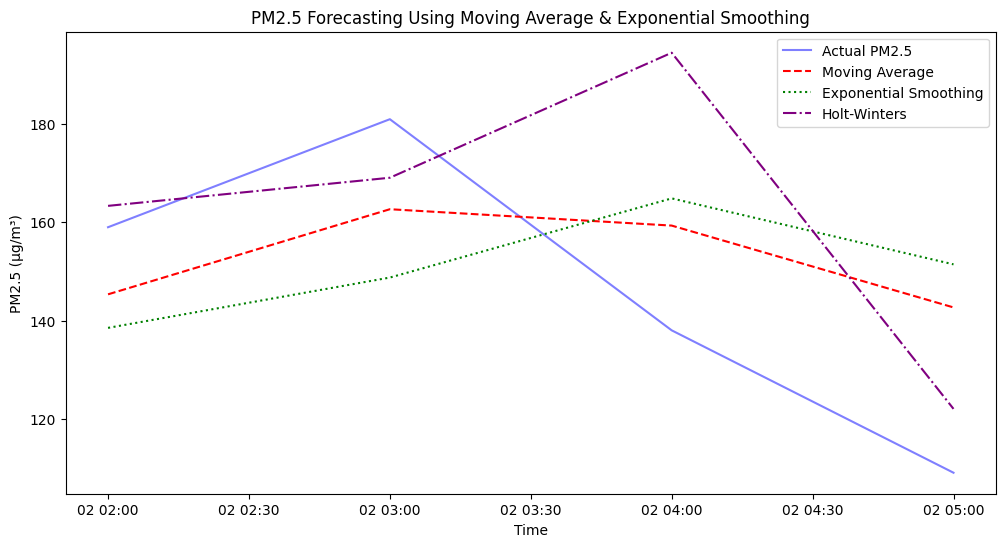

In [171]:
# Need to convert period in the dataframe to datetime object first.
# Convert PeriodIndex to DatetimeIndex
selected_df.index = selected_df.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(selected_df["PM2.5"], label="Actual PM2.5", color='blue', alpha=0.5)
plt.plot(selected_df["Moving_Avg"], label="Moving Average", color='red', linestyle="dashed")
plt.plot(selected_df["SES_Forecast"], label="Exponential Smoothing", color='green', linestyle="dotted")
plt.plot(selected_df["HW_Forecast"], label="Holt-Winters", color='purple', linestyle="dashdot")
plt.title("PM2.5 Forecasting Using Moving Average & Exponential Smoothing")
plt.xlabel("Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()
